In [31]:
%matplotlib inline

import re
from collections import defaultdict
from matplotlib import pyplot as plt

plt.style.use('ggplot')

In [32]:
with open('train.evaluation', 'r') as f:
    data = f.readlines()

In [33]:
iterations = defaultdict(lambda: {})

for chunk in [data[i:i + 9] for i in range(0, len(data), 9)]:
    it, alpha, p_hash = map(float, re.search(r'(\d+)_([\d, \.]+)_([\d, \.]+)\.txt', chunk[0]).groups())
    values = [float(re.search(r'[\d, \.]+$', chunk[row]).group()) for row in [2, 3, 4, 6, 7, 8]]
    iterations[(alpha, p_hash)][it] = values

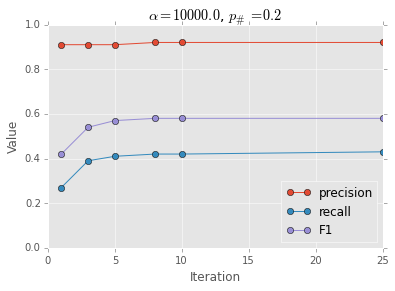

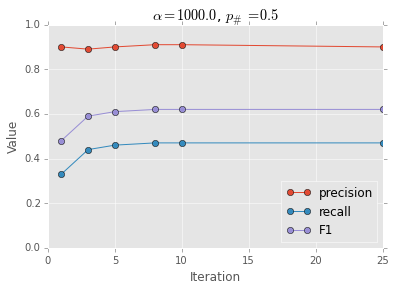

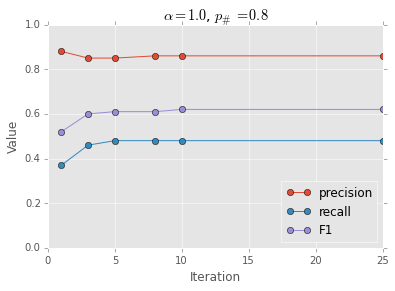

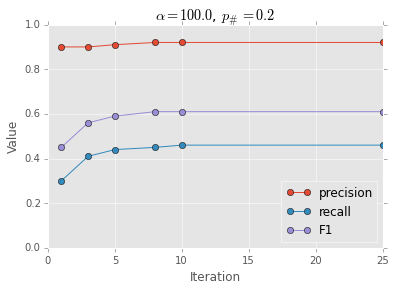

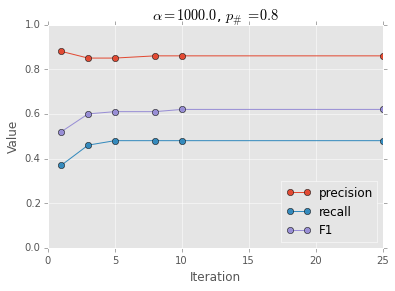

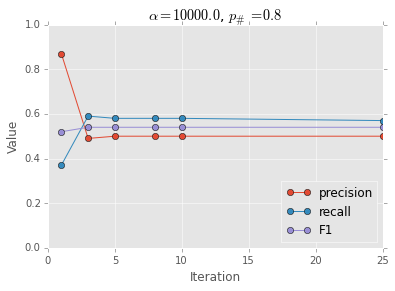

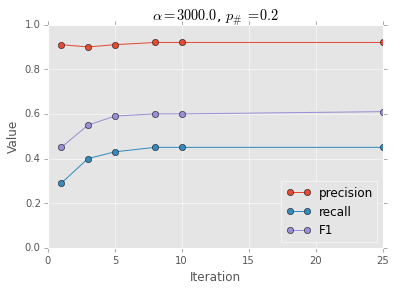

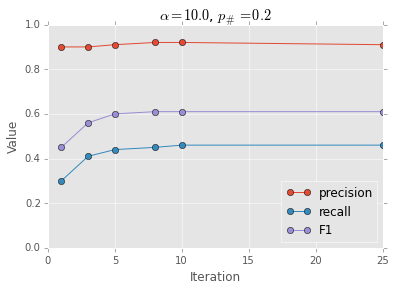

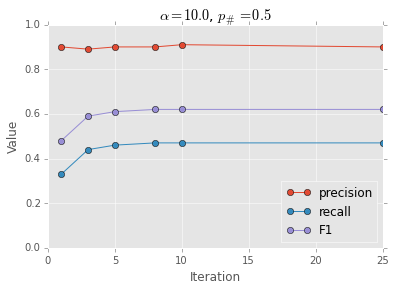

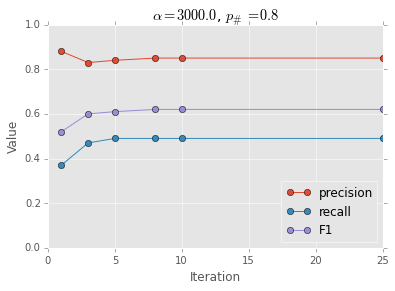

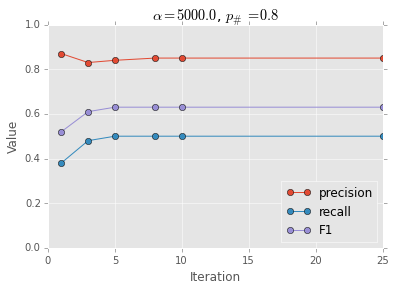

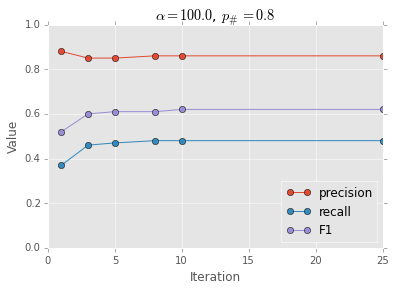

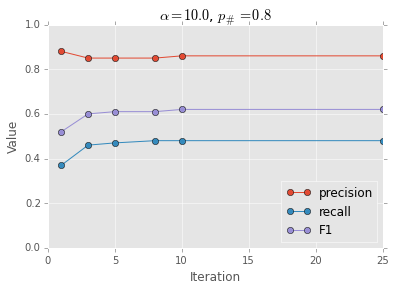

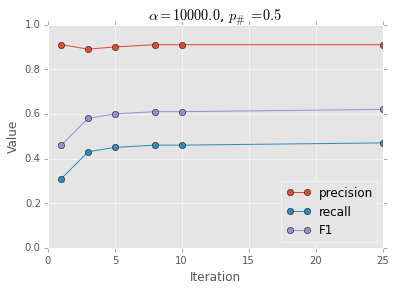

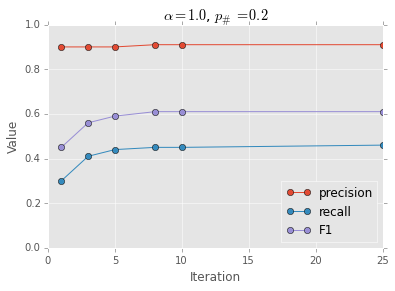

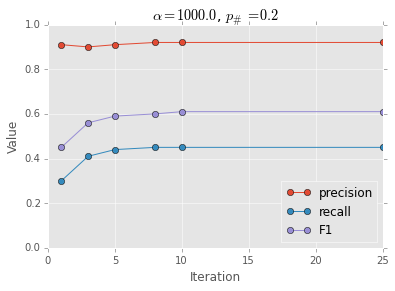

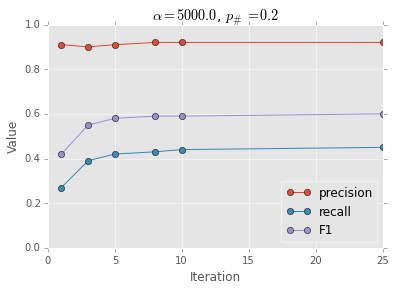

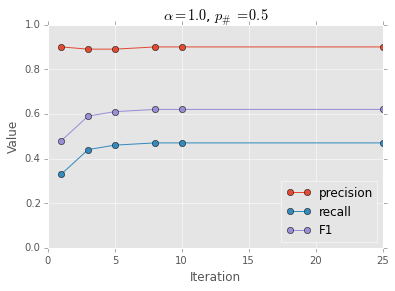

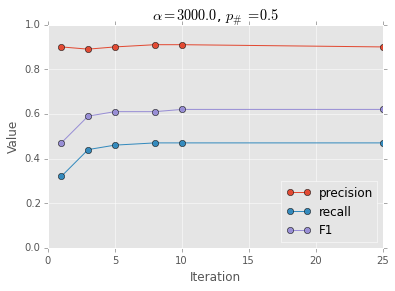

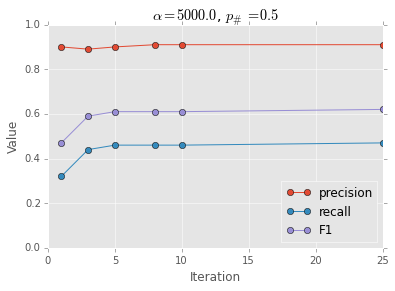

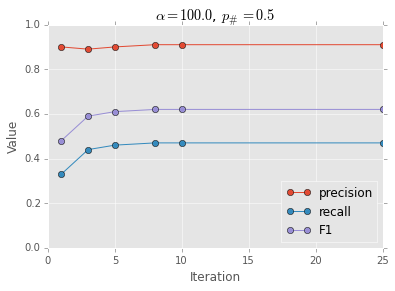

In [37]:
for params, values in iterations.items():
    alpha, p_hash = params

    xs  = sorted(values.keys())[:6]
    ps  = [values[x][0] for x in xs]
    rs  = [values[x][1] for x in xs]
    f1s = [values[x][2] for x in xs]

    plt.figure()
    plt.hold(True)
    plt.plot(xs, ps, label='precision', marker='o')
    plt.plot(xs, rs, label='recall', marker='o')
    plt.plot(xs, f1s, label='F1', marker='o')
    plt.title(r'$\alpha = {}$, $p_\# = {}$'.format(alpha, p_hash))
    plt.legend(loc='lower right')
    plt.ylim([0, 1])
    plt.xlabel('Iteration')
    plt.ylabel('Value')

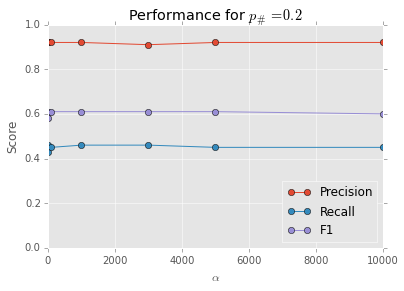

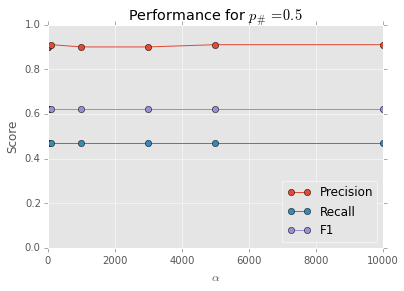

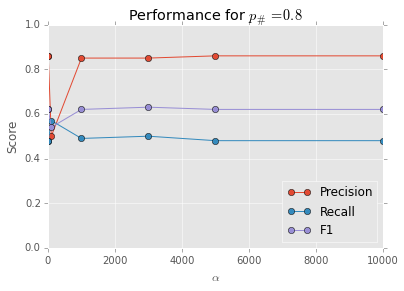

In [39]:
for ph in [0.2, 0.5, 0.8]:
    plt.figure()
    plt.hold(True)
    plt.title(r'Performance for $p_\# = {}$'.format(ph))

    xs = sorted(set([params[0] for params in iterations.keys()]))
    ps = []
    rs = []
    f1s = []

    for params, values in iterations.items():
        alpha, p_hash = params
        if p_hash != ph:
            continue

        ps.append(values[sorted(values.keys())[-1]][0])
        rs.append(values[sorted(values.keys())[-1]][1])
        f1s.append(values[sorted(values.keys())[-1]][2])

    plt.plot(xs, ps, marker='o', label='Precision')
    plt.plot(xs, rs, marker='o', label='Recall')
    plt.plot(xs, f1s, marker='o', label='F1')
    plt.ylim([0, 1])
    plt.xlabel(r'$\alpha$')
    plt.ylabel('Score')
    plt.legend(loc='lower right')